<a href="https://colab.research.google.com/github/Iktaik-Kim/MCP/blob/main/%EA%B3%B5%EC%82%AC_%EC%98%88%EC%A0%95%EA%B0%80%EA%B2%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 공사 예정가격.xlsx to 공사 예정가격.xlsx
데이터 기본 정보
데이터 shape: (1635, 2)
컬럼명: ['기초금액', '예정가격']

데이터 샘플:
         기초금액        예정가격
0   139194000   138241275
1  2178203000  2156110625
2   125588100   126990350
3   280357000   280712425
4   123000000   123494412

기술 통계량:
               기초금액          예정가격
count  1.635000e+03  1.635000e+03
mean   7.667647e+08  7.666645e+08
std    1.576707e+09  1.573076e+09
min    0.000000e+00  1.988907e+07
25%    1.571642e+08  1.575584e+08
50%    2.571668e+08  2.588325e+08
75%    5.977425e+08  5.978986e+08
max    1.492002e+10  1.475041e+10

결측치 확인:
기초금액    0
예정가격    0
dtype: int64


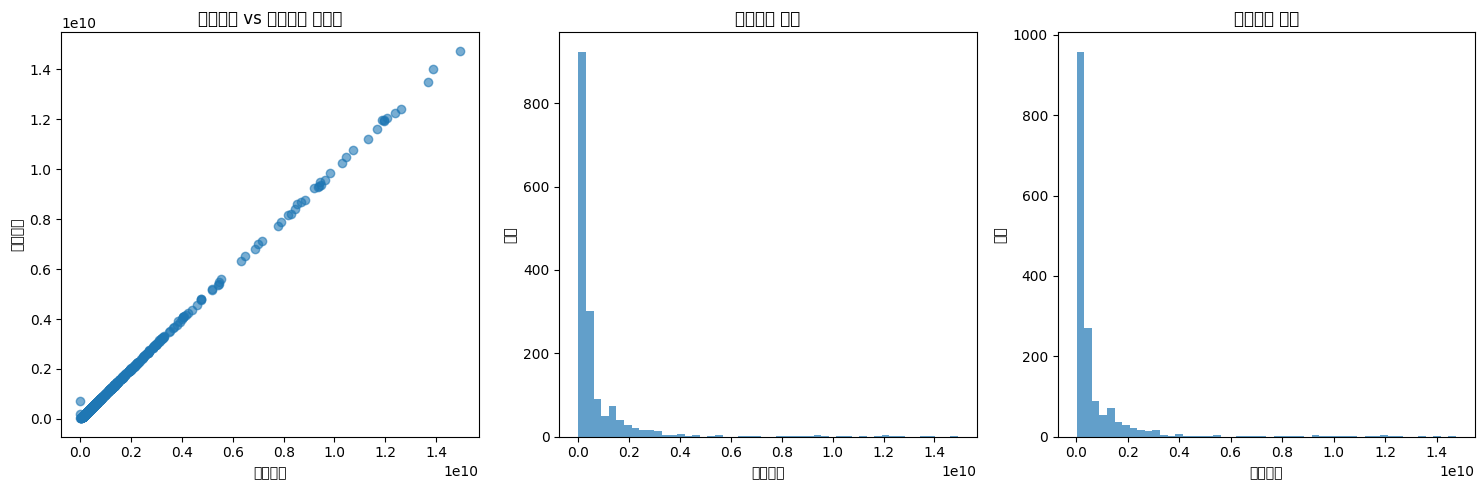

훈련 데이터: 1305개
테스트 데이터: 327개

모델 학습 및 평가

Linear Regression 학습 중...
Linear Regression 결과:
  R²: 0.9999
  MAE: 4,963,378
  RMSE: 15,053,231
  교차검증 R²: 0.9999 (±0.0000)
  학습 시간: 0.02초

Random Forest 학습 중...
Random Forest 결과:
  R²: 0.9993
  MAE: 9,141,319
  RMSE: 44,575,013
  교차검증 R²: 0.9993 (±0.0005)
  학습 시간: 0.14초

XGBoost 학습 중...
XGBoost 결과:
  R²: 0.9957
  MAE: 17,930,224
  RMSE: 109,499,605
  교차검증 R²: 0.9950 (±0.0023)
  학습 시간: 0.07초

모델 성능 비교
                       R2           MAE           MSE          RMSE  \
Linear Regression  0.9999  4.963378e+06  2.265998e+14  1.505323e+07   
Random Forest      0.9993  9.141319e+06  1.986932e+15  4.457501e+07   
XGBoost            0.9957  1.793022e+07  1.199016e+16  1.094996e+08   

                   CV R2 Mean  CV R2 Std  Training Time  
Linear Regression      0.9999     0.0000         0.0198  
Random Forest          0.9993     0.0005         0.1448  
XGBoost                0.9950     0.0023         0.0722  

회귀식/근사식
선형회귀식: 예정가격 = 1168650.24 + 

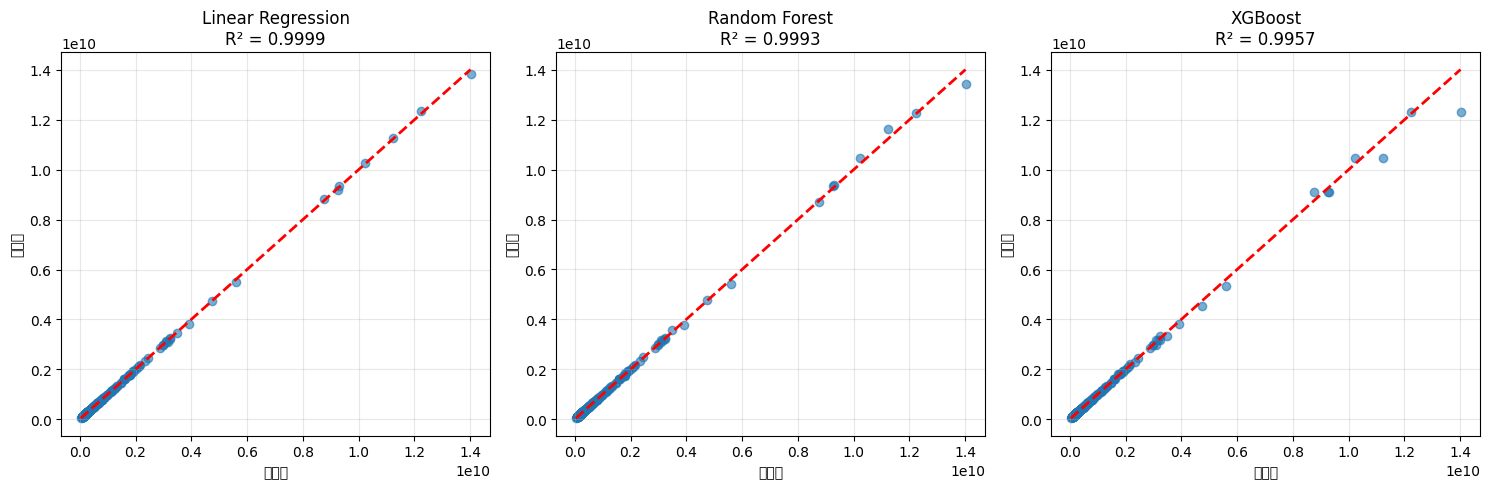

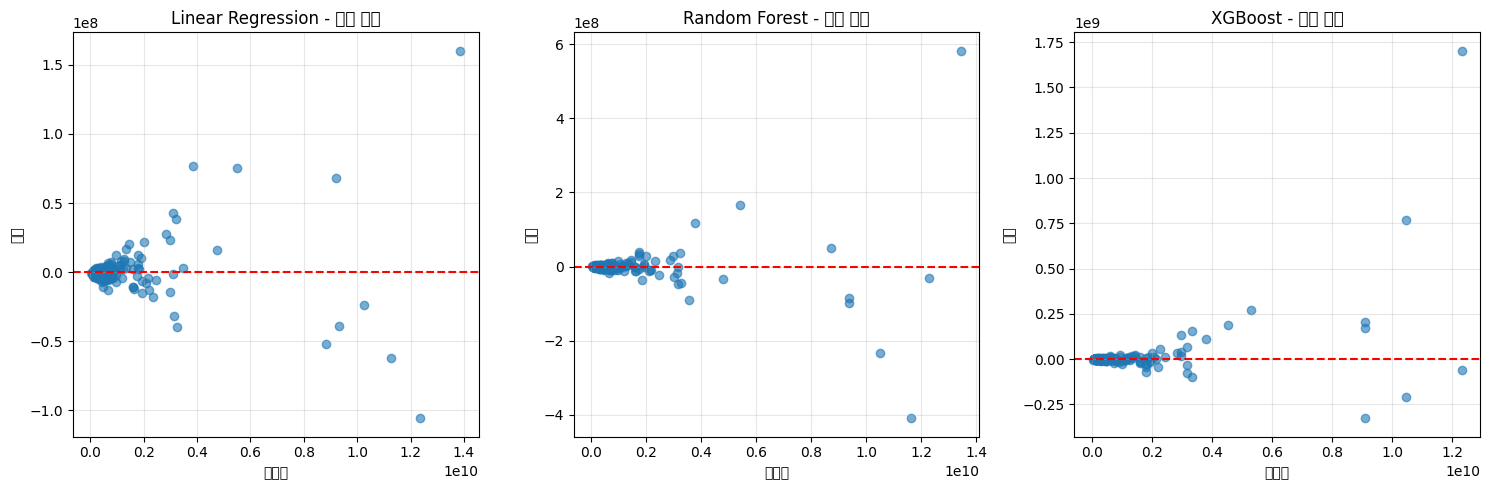

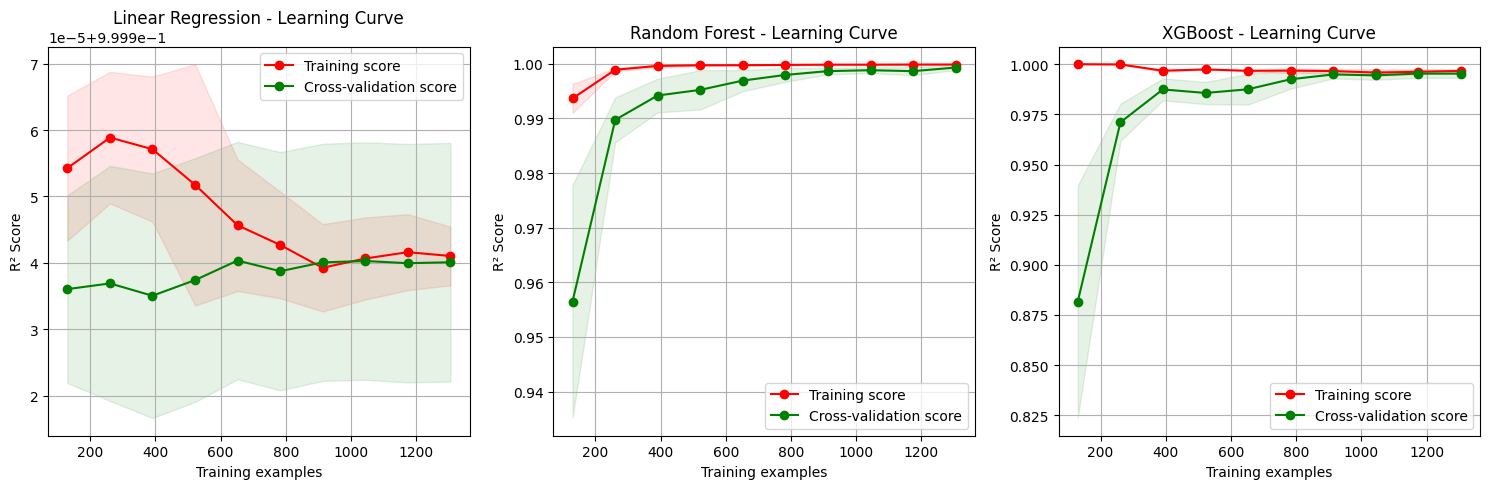


최종 결과 및 권장 모델
🎯 최적 모델: Linear Regression
📊 성능 지표:
   - R²: 0.9999
   - RMSE: 15,053,231
   - 학습 시간: 0.02초

📈 모델 선택 기준:
1. R² 값이 1에 가까울수록 좋음
2. RMSE 값이 작을수록 좋음
3. 교차검증 성능이 안정적일수록 좋음
4. 학습 시간이 짧을수록 좋음

대규모 금액 예측 분석
대규모 금액(상위 10%) 데이터에서의 성능:
  - 데이터 수: 164개
  - R²: 0.9999
  - RMSE: 36,760,155

예시 예측
기초금액 100,000,000원 → 예정가격 100,929,841원
기초금액 500,000,000원 → 예정가격 499,974,605원
기초금액 1,000,000,000원 → 예정가격 998,780,559원
기초금액 5,000,000,000원 → 예정가격 4,989,228,195원

✅ 분석 완료! 모든 모델의 비교 평가가 완료되었습니다.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드

from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_excel('공사 예정가격.xlsx')
df.head()

# 데이터 탐색
print("=" * 50)
print("데이터 기본 정보")
print("=" * 50)
print(f"데이터 shape: {df.shape}")
print(f"컬럼명: {df.columns.tolist()}")
print("\n데이터 샘플:")
print(df.head())
print("\n기술 통계량:")
print(df.describe())
print("\n결측치 확인:")
print(df.isnull().sum())

# 데이터 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['기초금액'], df['예정가격'], alpha=0.6)
plt.xlabel('기초금액')
plt.ylabel('예정가격')
plt.title('기초금액 vs 예정가격 산점도')

plt.subplot(1, 3, 2)
plt.hist(df['기초금액'], bins=50, alpha=0.7)
plt.xlabel('기초금액')
plt.ylabel('빈도')
plt.title('기초금액 분포')

plt.subplot(1, 3, 3)
plt.hist(df['예정가격'], bins=50, alpha=0.7)
plt.xlabel('예정가격')
plt.ylabel('빈도')
plt.title('예정가격 분포')

plt.tight_layout()
plt.show()

# 데이터 전처리
# 0값 제거 (의미 없는 데이터)
df = df[(df['기초금액'] > 0) & (df['예정가격'] > 0)]

# 특성과 타겟 분리
X = df[['기초금액']].values
y = df['예정가격'].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"훈련 데이터: {X_train.shape[0]}개")
print(f"테스트 데이터: {X_test.shape[0]}개")

# 모델 정의
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )
}

# 모델 학습 및 평가 결과 저장
results = {}
training_times = {}
predictions = {}

print("\n" + "=" * 50)
print("모델 학습 및 평가")
print("=" * 50)

for name, model in models.items():
    print(f"\n{name} 학습 중...")

    # 학습 시간 측정
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times[name] = training_time

    # 예측
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # 성능 지표 계산
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # 교차 검증
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    results[name] = {
        'R2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'CV R2 Mean': cv_scores.mean(),
        'CV R2 Std': cv_scores.std(),
        'Training Time': training_time
    }

    print(f"{name} 결과:")
    print(f"  R²: {r2:.4f}")
    print(f"  MAE: {mae:,.0f}")
    print(f"  RMSE: {rmse:,.0f}")
    print(f"  교차검증 R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"  학습 시간: {training_time:.2f}초")

# 결과 비교 테이블
results_df = pd.DataFrame(results).T
print("\n" + "=" * 50)
print("모델 성능 비교")
print("=" * 50)
print(results_df.round(4))

# 회귀식/근사식 표현
print("\n" + "=" * 50)
print("회귀식/근사식")
print("=" * 50)

# 선형회귀 계수
lr_model = models['Linear Regression']
print(f"선형회귀식: 예정가격 = {lr_model.intercept_:.2f} + {lr_model.coef_[0]:.4f} × 기초금액")

# 트리 기반 모델의 특성 중요도
print("\n특성 중요도 (Tree 기반 모델):")
for name in ['Random Forest', 'XGBoost']:
    if hasattr(models[name], 'feature_importances_'):
        importance = models[name].feature_importances_[0]
        print(f"  {name}: {importance:.4f}")

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(15, 5))

for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('실제값')
    plt.ylabel('예측값')
    plt.title(f'{name}\nR² = {results[name]["R2"]:.4f}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 시각화: 잔차 분석
plt.figure(figsize=(15, 5))

for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 3, i)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('예측값')
    plt.ylabel('잔차')
    plt.title(f'{name} - 잔차 플롯')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 학습 곡선 시각화
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='r2'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("R² Score")
    plt.title(f"{name} - Learning Curve")
    plt.legend(loc="best")

plt.tight_layout()
plt.show()

# 최적 모델 선정
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]

print("\n" + "=" * 50)
print("최종 결과 및 권장 모델")
print("=" * 50)
print(f"🎯 최적 모델: {best_model_name}")
print(f"📊 성능 지표:")
print(f"   - R²: {results[best_model_name]['R2']:.4f}")
print(f"   - RMSE: {results[best_model_name]['RMSE']:,.0f}")
print(f"   - 학습 시간: {results[best_model_name]['Training Time']:.2f}초")

print("\n📈 모델 선택 기준:")
print("1. R² 값이 1에 가까울수록 좋음")
print("2. RMSE 값이 작을수록 좋음")
print("3. 교차검증 성능이 안정적일수록 좋음")
print("4. 학습 시간이 짧을수록 좋음")

# 추가 분석: 대규모 데이터에 대한 예측 성능
print("\n" + "=" * 50)
print("대규모 금액 예측 분석")
print("=" * 50)

# 상위 10% 큰 금액 데이터에 대한 성능 확인
large_amount_threshold = np.percentile(df['기초금액'], 90)
large_mask = df['기초금액'] >= large_amount_threshold
X_large = df[large_mask][['기초금액']].values
y_large = df[large_mask]['예정가격'].values

if len(X_large) > 0:
    y_pred_large = best_model.predict(X_large)
    r2_large = r2_score(y_large, y_pred_large)
    rmse_large = np.sqrt(mean_squared_error(y_large, y_pred_large))

    print(f"대규모 금액(상위 10%) 데이터에서의 성능:")
    print(f"  - 데이터 수: {len(X_large)}개")
    print(f"  - R²: {r2_large:.4f}")
    print(f"  - RMSE: {rmse_large:,.0f}")

# 모델 배포를 위한 함수 정의
def predict_expected_price(basic_amount, model=best_model):
    """기초금액을 입력받아 예정가격을 예측하는 함수"""
    if not isinstance(basic_amount, (int, float)) or basic_amount <= 0:
        raise ValueError("기초금액은 0보다 큰 숫자여야 합니다.")

    prediction = model.predict([[basic_amount]])[0]
    return prediction

# 예시 예측
print("\n" + "=" * 50)
print("예시 예측")
print("=" * 50)
sample_amounts = [100000000, 500000000, 1000000000, 5000000000]
for amount in sample_amounts:
    predicted = predict_expected_price(amount)
    print(f"기초금액 {amount:>,}원 → 예정가격 {predicted:>,.0f}원")

print("\n✅ 분석 완료! 모든 모델의 비교 평가가 완료되었습니다.")